In [3]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
train_data = pd.read_csv("emnist/emnist-balanced-train.csv", header = None)
test_data = pd.read_csv("emnist/emnist-balanced-test.csv", header = None)
mapping = pd.read_csv("emnist/emnist-balanced-mapping.txt", sep = ' ', header = None)

In [5]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,112800.0,23.0,13.56472,0.0,11.0,23.0,35.0,46.0
1,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
2,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
3,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
4,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
781,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
782,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
783,112800.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing

- Describe the dataset
- Separate out the label column
- Translate from ascii code to character
- Visualize some instances
- Normalize the data
- Flip and rotate the data

#### Preprocessing

In [8]:
train_data.shape

(112800, 785)

In [9]:
test_data.shape

(18800, 785)

For the training phase, we have 112800 samples (images), each is represented by 784 feature (28x28 pixels)

In [10]:
# Rename label column
train_data.rename(columns= {0: 'label'}, inplace = True)
test_data.rename(columns= {0: 'label'}, inplace = True)
train_data.columns

Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)

In [11]:
mapping.head()

,0,1
0,0,48
1,1,49
2,2,50
3,3,51
4,4,52


In [12]:
train_data['label'].unique()

array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3,
       40, 14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31,
       16,  7,  2,  8, 10,  6, 27, 33, 11, 18, 41,  0, 21])

Our label ranges from 0 to 45 which means they are indices in mapping dataframe, not the ascii code

In [13]:
# Create mapping dictionary
map_dict = {}
asc_code = mapping[1].values
for i, v in enumerate(asc_code):
    map_dict[i] = chr(v)
    
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In this notebook I want to predict the uppercase letters and digits only, so I will filter out all lowercase letters in the datasets

In [14]:
acceptable_range = np.arange(0, 36)
train_data = train_data[train_data["label"].isin(acceptable_range)]
test_data = test_data[test_data["label"].isin(acceptable_range)]
np.sort(train_data.label.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [15]:
# Resetting data index
train_data.reset_index(inplace = True)
train_data

,index,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
test_data.reset_index(inplace = True)

In [17]:
train_data = train_data.drop(['index'], axis = 1)
test_data = test_data.drop(['index'], axis = 1)

In [18]:
train_data.columns

Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)

In [19]:
# Separate X and Y
X = train_data.drop(['label'], axis = 1).values
Y = train_data['label'].values
x_test = test_data.drop(['label'], axis = 1).values
y_test = test_data['label'].values
X = X/255.
x_test = x_test/ 255.

### Visualization

In [ ]:
# Visulize a sample image
W, H = 28, 28 # width and height of the image
sample = X[1000, :]
sample = sample.reshape(W, H)
print(f"Label 1000: {map_dict[Y[1000]]}")
plt.imshow(sample)
plt.show()

Label 400: R


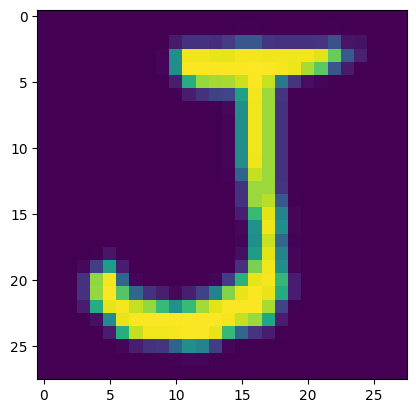

In [21]:
def flip_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print(f"Label 400: {map_dict[Y[400]]}")
plt.imshow(flip_rotate(sample))
plt.show()

In [22]:
X = (np.apply_along_axis(flip_rotate, 1, X)).reshape(-1, 784)
x_test = (np.apply_along_axis(flip_rotate, 1, x_test)).reshape(-1, 784)

In [23]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### Visulize more images

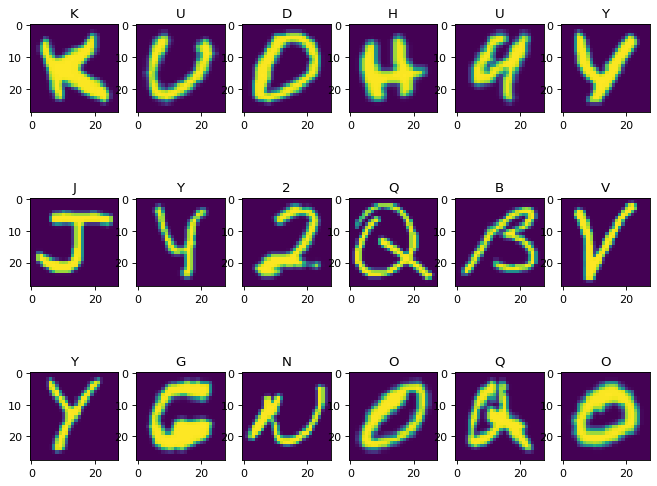

In [24]:
plt.figure(figsize=(10, 8), dpi=80)
for i in range(100, 118):
    plt.subplot(3,6,i-99)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title(map_dict[y_train[i]])

# Random Forest Classifier

In [25]:
rf = RandomForestClassifier(random_state = 42, criterion = "log_loss")
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', random_state=42)

![Alt Text](./images/random_forest.png)


In [26]:
def evaluate(model):
    y_pred = model.predict(x_train)
    print("Training accuracy: " + str(accuracy_score(y_train, y_pred)))
    y_pred = model.predict(x_val)
    print("Validation accuracy: " + str(accuracy_score(y_val, y_pred)))
    y_pred = model.predict(x_test)
    print("Test accuracy: " + str(accuracy_score(y_test, y_pred)))


In [27]:
evaluate(rf)

Training accuracy: 1.0
Validation accuracy: 0.8442515432098765
Test accuracy: 0.8408333333333333


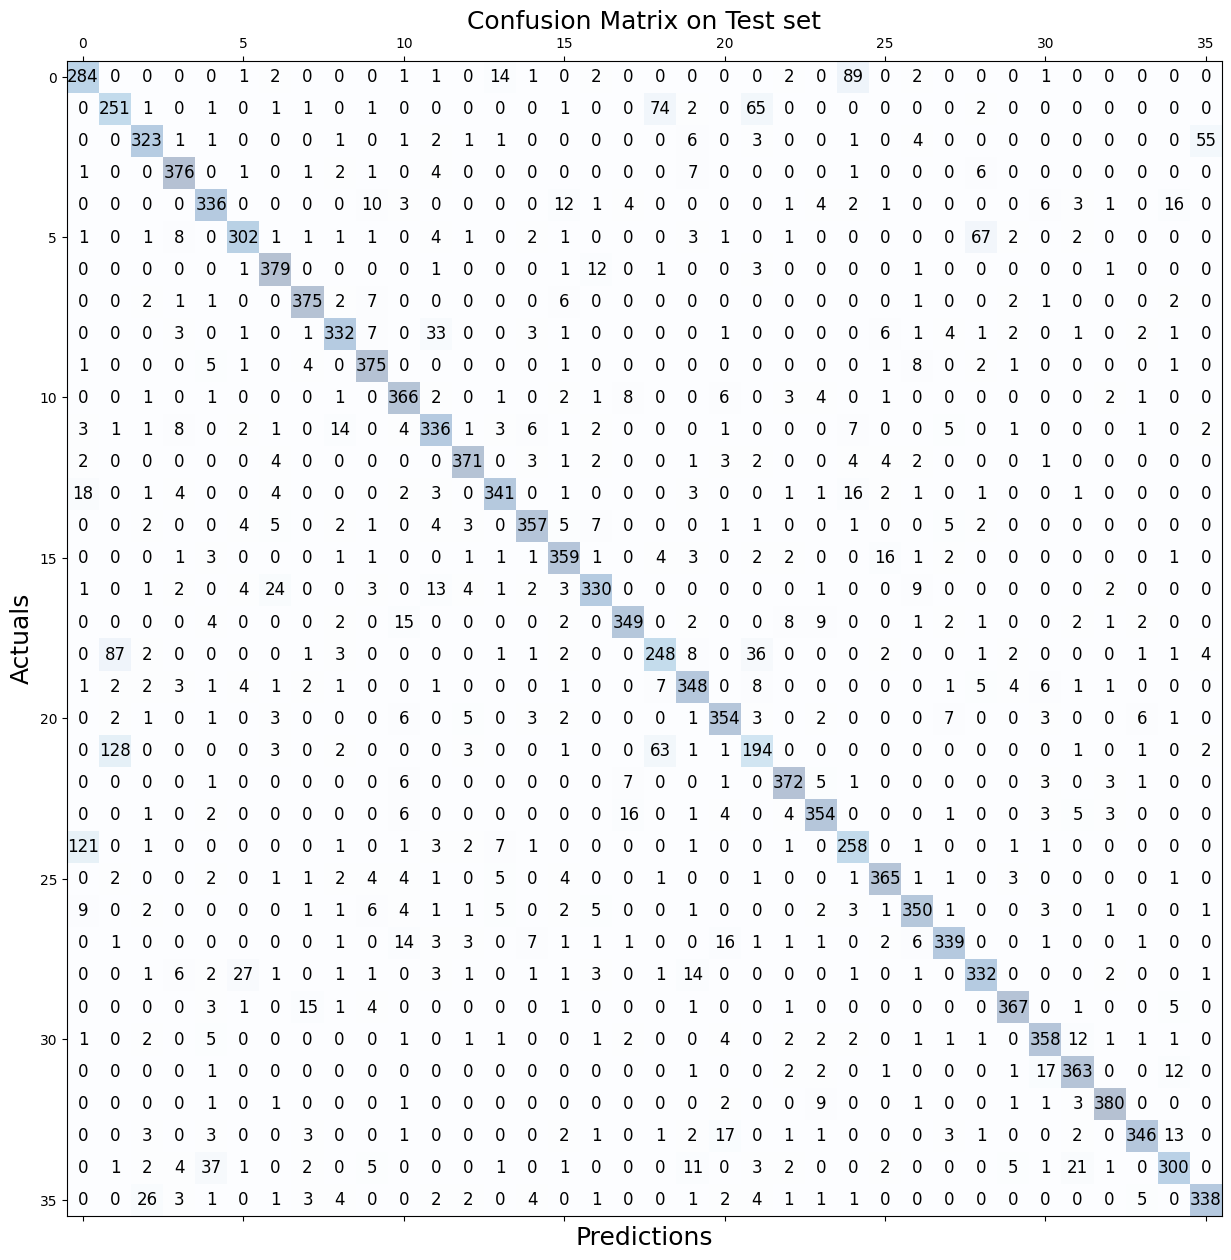

In [28]:
y_pred = rf.predict(x_test)
matrix = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix on Test set', fontsize=18)
plt.show()

In [ ]:
false_y_pred = y_pred == y_test
nrows = 1
ncols = 10
f, axarr = plt.subplots(nrows, ncols, figsize = (ncols, nrows))

col = 0
for i in range(y_pred.shape[0]):
    chk = false_y_pred[i]
    if col < 10:
        if not chk:
            axarr[col].imshow(x_test[i].reshape(28, 28))
            axarr[col].set_title(f"true: {map_dict[y_test[i]]}\n pred: {map_dict[y_pred[i]]}")
            axarr[col].axis('off')
            col += 1
    else: break

In [30]:
plt.style.use('bmh')

In [31]:
# Stratified Sampling
def stratified_sampling(data, size_per_class):
    labels = data['label'].unique()
    sample_values = np.empty(shape = (size_per_class*(labels.size), data.shape[1]))
    for i in range(len(labels)):
        l = labels[i]
        class_df = data[data['label'] == l]
        sample = class_df.sample(n = size_per_class, random_state = 123).values
        sample_values[i*size_per_class: (i+1)*size_per_class, :] = sample
    df = pd.DataFrame(sample_values, columns = data.columns)
    return df

In [32]:
def evaluate_graph(model, x, y):
    y_pred = model.predict(x)
    acc = accuracy_score(y, y_pred)
    print("Accuracy: " + str(acc))
    return acc

In [33]:
samples = stratified_sampling(train_data, 2000)
samples.label.value_counts()

label
15.0    2000
4.0     2000
26.0    2000
32.0    2000
20.0    2000
1.0     2000
13.0    2000
24.0    2000
12.0    2000
5.0     2000
17.0    2000
3.0     2000
14.0    2000
19.0    2000
29.0    2000
25.0    2000
35.0    2000
28.0    2000
23.0    2000
22.0    2000
34.0    2000
9.0     2000
30.0    2000
31.0    2000
16.0    2000
7.0     2000
2.0     2000
8.0     2000
10.0    2000
6.0     2000
27.0    2000
33.0    2000
11.0    2000
18.0    2000
0.0     2000
21.0    2000
Name: count, dtype: int64

### Training size

In [39]:
X = train_data.drop(['label'], axis = 1)
Y = train_data['label']

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

per_class_range = np.arange(200, 1500, 100)
train_acc = []
val_acc = []

for pc in per_class_range:
    sample_train = x_train.copy()
    sample_train['label'] = y_train.values
    sample_train = stratified_sampling(sample_train, pc)
    X = sample_train.drop(['label'], axis = 1).values
    Y = sample_train['label'].values

    rf = RandomForestClassifier()
    rf.fit(X, Y)
    print(f"Traning size: {pc}")
    print("Validation", end = " ")
    train_acc.append(evaluate_graph(rf, x_train, y_train))


Traning size: 200
Validation Accuracy: 0.7872685185185185
Traning size: 300
Validation Accuracy: 0.8161747685185186
Traning size: 400
Validation Accuracy: 0.8393229166666667
Traning size: 500
Validation Accuracy: 0.8549623842592593
Traning size: 600
Validation Accuracy: 0.8698061342592592
Traning size: 700
Validation Accuracy: 0.8823061342592593
Traning size: 800
Validation Accuracy: 0.8944299768518519
Traning size: 900
Validation Accuracy: 0.9058015046296296
Traning size: 1000
Validation Accuracy: 0.9161892361111111
Traning size: 1100
Validation Accuracy: 0.9273148148148148
Traning size: 1200
Validation Accuracy: 0.9364438657407408
Traning size: 1300
Validation Accuracy: 0.945949074074074
Traning size: 1400
Validation Accuracy: 0.9551504629629629


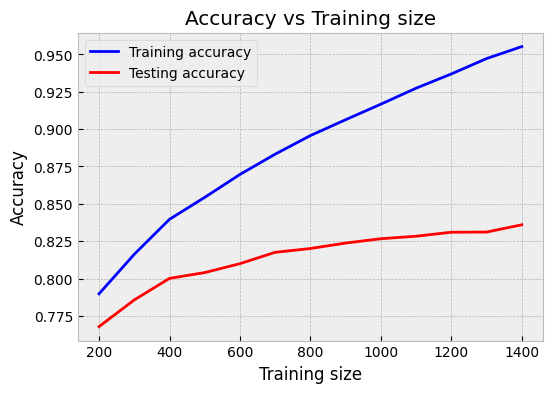

In [35]:
plt.figure(figsize = (6, 4))
plt.plot(per_class_range, train_acc, 'b')
plt.plot(per_class_range, val_acc, 'r')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Testing accuracy"])
plt.title("Accuracy vs Training size")
plt.show()